In [5]:
# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# allows charts to appear in the notebook
%matplotlib inline

In [102]:
# Import the dataset
dataset = pd.read_csv("cars.csv")

In [103]:
dataset.shape

(261, 8)

In [104]:
#check for null value 
dataset.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [105]:
#lets print column names of dataset
dataset.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [106]:
#column names have a space before the name so rename it
for col in dataset.columns:
    dataset.rename(columns={col: col.strip()}, inplace=True)
dataset.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [107]:
# check columns data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [108]:
#check for null value again
dataset.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [109]:
dataset['cubicinches'].mode()

0    97
Name: cubicinches, dtype: object

In [110]:
# change columns type from object to numeric
dataset['cubicinches'] = pd.to_numeric(dataset['cubicinches'], errors='coerce')
dataset['weightlbs'] = pd.to_numeric(dataset['weightlbs'], errors='coerce')

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [112]:
dataset['cubicinches'].mode()

0    97.0
Name: cubicinches, dtype: float64

In [113]:
dataset['cubicinches']= dataset['cubicinches'].fillna(dataset['cubicinches'].mode()[0])
dataset['weightlbs'] = dataset['weightlbs'].fillna(dataset['weightlbs'].mean())

In [114]:
# remove the brand column since it has strings
X = dataset[dataset.columns[:-1]]

# eliminating null values in columns with the mean of the column
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


C:\Users\Admin\AppData\Local\Temp\ipykernel_13020\4207926116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].fillna(int(X[i].mean()))


In [115]:
#check for null value again
X.isna().sum()
X

mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year
0    14.0          8        350.0  165     4209.0          12  1972
1    31.9          4         89.0   71     1925.0          14  1980
2    17.0          8        302.0  140     3449.0          11  1971
3    15.0          8        400.0  150     3761.0          10  1971
4    30.5          4         98.0   63     2051.0          17  1978
..    ...        ...          ...  ...        ...         ...   ...
256  17.0          8        305.0  130     3840.0          15  1980
257  36.1          4         91.0   60     1800.0          16  1979
258  22.0          6        232.0  112     2835.0          15  1983
259  18.0          6        232.0  100     3288.0          16  1972
260  22.0          6        250.0  105     3353.0          15  1977

[261 rows x 7 columns]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

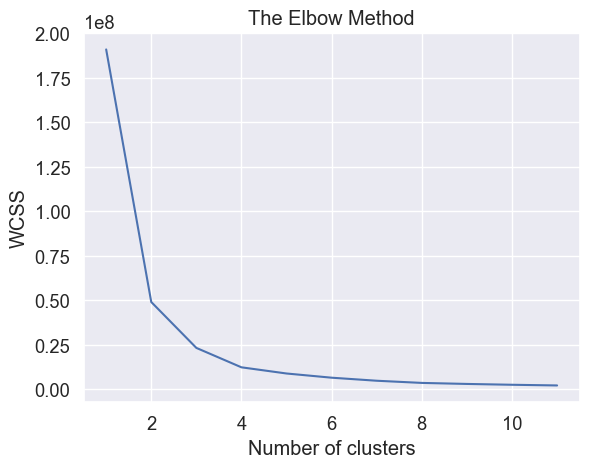

In [116]:
# using the elbow method to find the optimal numbers of clusters
import os
from sklearn.cluster import KMeans
os.environ['OMP_NUM_THREADS'] = '2'

# WSS (Within sum of squares) - sum of squared distance between each member of the cluster
# and its centroid
wcss = []

# train our AI eleven times
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,12),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [117]:
# Apply K-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.to_numpy()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [118]:
print(y_kmeans)

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]


In [119]:
print(X)

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


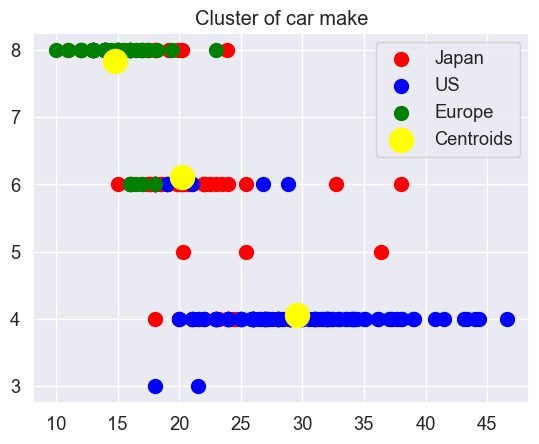

In [98]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=100,c='red',label='Japan')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=100,c='blue',label='US')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of car make')
plt.legend()
plt.show()